数据收集与整合

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.sans-serif"]=['SimHei']#用来正常显示中文标签  
plt.rcParams["axes.unicode_minus"]=False#用来正常显示负号 

In [4]:
basket = pd.read_csv('D:/Learn/课程/第三学期/python数学运算与数据可视化/大作业/数据/Basket.csv')
basket['SDATE']=pd.to_datetime(basket['SDATE'])
basket.isnull().any()

SDATE         False
STORE_CODE    False
POS_NO        False
BASK_CODE     False
BASK_SPEND    False
dtype: bool

In [29]:
basket.describe()#查看数据分布情况

,POS_NO,BASK_CODE,BASK_SPEND
count,571552.000000,571552.000000,571552.000000
mean,2.998429,167472.817102,38.973310
std,2.516065,87263.199857,209.038276
min,1.000000,961.000000,-35940.000000
25%,1.000000,90533.750000,9.000000
50%,2.000000,177603.500000,19.900000
75%,3.000000,238816.750000,44.700000
max,20.000000,323914.000000,79920.000000


In [5]:
item = pd.read_csv('D:/Learn/课程/第三学期/python数学运算与数据可视化/大作业/数据/item.csv')
item['SDATE']=pd.to_datetime(item['SDATE'])
item.isnull().any()

SDATE              False
STORE_CODE         False
POSID              False
BASK_CODE          False
PROD_CODE          False
ITEM_QUANTITY      False
ITEM_SPEND         False
NORMAL_PRICE       False
DISCOUNT_TYPE      False
DISCOUNT_AMOUNT    False
dtype: bool

数据清洗

异常值检测

In [14]:
spend=basket['BASK_SPEND']

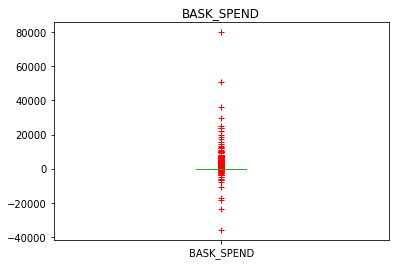

In [15]:
spend.plot(kind='box',title='BASK_SPEND',sym='r+')

In [13]:
spend.describe()

count    571552.000000
mean         38.973310
std         209.038276
min      -35940.000000
25%           9.000000
50%          19.900000
75%          44.700000
max       79920.000000
Name: BASK_SPEND, dtype: float64

删除异常值

In [22]:
basket_new1=basket[basket['BASK_SPEND']>0]  #剔除basket中bask_spend列小于0的行
basket_new1.head()

,SDATE,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018-06-01,D007,3,250458,8.0
1,2018-06-01,D007,3,250200,32.7
2,2018-06-01,D007,1,161068,16.8
3,2018-06-01,D007,8,5325,30.4
4,2018-06-01,D007,8,5361,191.3


In [39]:
basket_new2=basket_new1[basket_new1['BASK_SPEND']<80]

In [40]:
basket_new2.duplicated().sum()#查看是否有重复值

0

商店情况

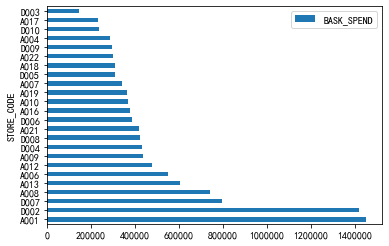

In [83]:
a=basket_new2.groupby('STORE_CODE')['BASK_SPEND'].sum().reset_index().sort_values(by = 'BASK_SPEND',ascending = False)#商店按消费额大小排序
a.set_index('STORE_CODE',inplace=True)
a.plot(kind='barh')

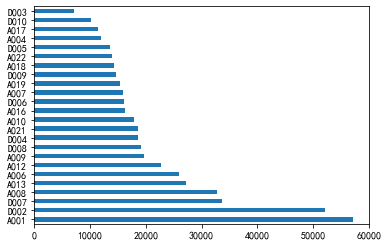

In [89]:
b=basket_new2.loc[:,'STORE_CODE'].value_counts()#商店按结账次数大小排序
b.plot(kind='barh')

In [90]:
basket_new2['year'] = basket_new2['SDATE'].dt.year
basket_new2['month'] = basket_new2['SDATE'].dt.month
basket_new2['day']= basket_new2['SDATE'].values.astype('datetime64[D]')#方便后续的分析，新增加年份列和月份列

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

In [91]:
#按照年份、月份对销售子数据集进行分组求和
sales_month = basket_new2[['SDATE','BASK_SPEND','month']]
sales_month = sales_month.groupby(['month','SDATE']).sum()
sales_month

BASK_SPEND
month SDATE                 
6     2018-06-01   372014.79
      2018-06-02   384824.51
      2018-06-03   358051.25
      2018-06-04   306442.13
      2018-06-05   334589.50
      2018-06-06   305265.29
      2018-06-07   268823.87
      2018-06-08   319838.59
      2018-06-09   356284.22
      2018-06-10   385072.00
      2018-06-11   300950.47
      2018-06-12   310259.45
      2018-06-13   392956.65
      2018-06-14   324691.35
      2018-06-15   356382.98
      2018-06-16   449349.10
      2018-06-17   548640.23
      2018-06-18   503948.59
      2018-06-19   236092.04
      2018-06-20   312420.39
      2018-06-21   279150.80
      2018-06-22   243039.39
      2018-06-23   340109.18
      2018-06-24   314074.80
      2018-06-25   267268.25
      2018-06-26   267295.65
      2018-06-27   324225.23
      2018-06-28   273228.12
      2018-06-29   309493.31
      2018-06-30   371727.13
7     2018-07-01   365270.84
      2018-07-02   298560.09
      2018-07-03   318702.93
      2018-07-04   328976.48
      2018-07-05   269033.74

In [92]:
# 整体销售情况子数据集，包含下单日期、销售额、年份、月份信息
sales_data = basket_new2[['SDATE','BASK_SPEND','month','day']]
#按照年份、月份对销售子数据集进行分组求和
sales_year = sales_data.groupby(['month','day']).sum()
sales_year.style.background_gradient()# 颜色越深，销售额越高
#按周六日呈周期性递增态势

顾客分析

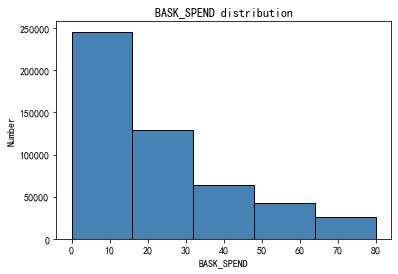

In [93]:
plt.hist(x = basket_new2.BASK_SPEND, # 指定绘图数据
          bins = 5, # 指定直方图中条块的个数
         color = 'steelblue', # 指定直方图的填充色
         edgecolor = 'black' # 指定直方图的边框色          
        )
# 添加x轴和y轴标签
plt.xlabel('BASK_SPEND')
plt.ylabel('Number')

plt.title('BASK_SPEND distribution')
 # 显示图形
plt.show()